In [1]:
import pandas as pd 
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [2]:
data = pd.read_csv(r"C:\Users\ruth\Documents\software courses\3rd year\2nd Semester\Fundamental Of Machine Learning\Assignment\Hate-Speech-Detection\Data\labeled_data.csv")
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
data['label'] = data['class'].map({0:"Hate Speech Detected",1:"Hate Speech Detected",2:"No Hate speech"})
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,label
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate speech
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Hate Speech Detected
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Hate Speech Detected
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Hate Speech Detected
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Hate Speech Detected


In [4]:
# defining a function for data processing
def data_processing(data):
    data = data.lower()
    data = re.sub(r"https\S+|www\S+http\S+", '', data)
    data = re.sub(r'\@w+|\#','', data)
    data = re.sub(r'[^\w\s]','',data)
    data = re.sub(r'ð','',data)
    return data 

In [5]:
data.tweet = data['tweet'].apply(data_processing)

In [6]:
data = data.drop_duplicates('tweet')

In [7]:
print(data['tweet'].iloc[0],"\n")
print(data['tweet'].iloc[1],"\n")
print(data['tweet'].iloc[2],"\n")
print(data['tweet'].iloc[3],"\n")
print(data['tweet'].iloc[4],"\n")

 rt mayasolovely as a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out 

 rt mleew17 boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place 

 rt urkindofbrand dawg rt 80sbaby4life you ever fuck a bitch and she start to cry you be confused as shit 

 rt c_g_anderson viva_based she look like a tranny 

 rt shenikaroberts the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361 



In [8]:
data[['tweet','label']].head()

,tweet,label
0,rt mayasolovely as a woman you shouldnt compl...,No Hate speech
1,rt mleew17 boy dats coldtyga dwn bad for cuff...,Hate Speech Detected
2,rt urkindofbrand dawg rt 80sbaby4life you eve...,Hate Speech Detected
3,rt c_g_anderson viva_based she look like a tr...,Hate Speech Detected
4,rt shenikaroberts the shit you hear about me ...,Hate Speech Detected


In [9]:
data['label'].value_counts()

Hate Speech Detected    20582
No Hate speech           4161
Name: label, dtype: int64

<AxesSubplot: xlabel='label', ylabel='count'>

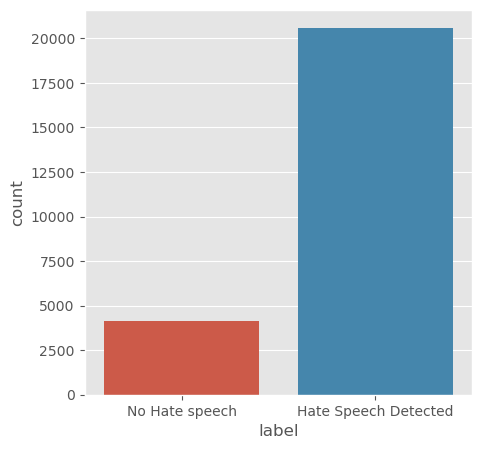

In [10]:
style.use('ggplot')
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = data)

In [11]:
cv = CountVectorizer()
X=cv.fit_transform(data['tweet'])
Y=data['label']

In [12]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [13]:
model = LogisticRegression(solver='lbfgs', max_iter=100).fit(X_train,Y_train)
pred = model.predict(x_test)
model_accuracy = accuracy_score(pred,y_test)
print("Model Accuracy: {:.2f}%".format(model_accuracy*100))

Model Accuracy: 95.25%


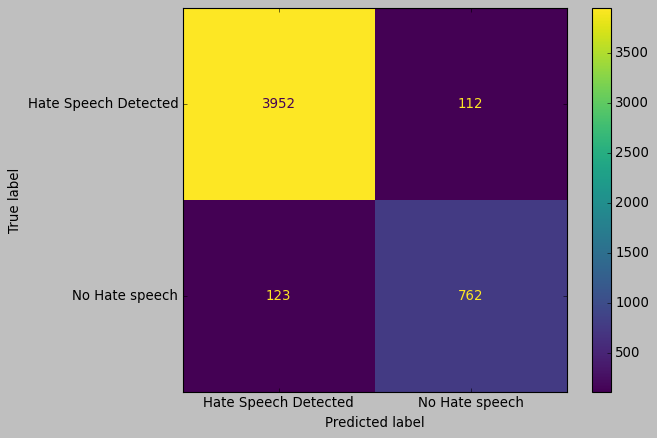

In [14]:
style.use('classic')
cm = confusion_matrix(y_test, pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [15]:
test_data = "you are awesome"
df = cv.transform([test_data]).toarray()
print(model.predict(df))

['No Hate speech']
